# Quality Analysis


## Measure analysis


I'm just gonna start with quality because its the most simple and that can help me set the graphing framework for the rest

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
quality_path = r'D:\Andre programmer\Github\Github_Repo\P4\Data\quality_old.csv'
q_df = pd.read_csv(quality_path)
q_df

,Unnamed: 0,File,Version,ICR,IPR,IMI
0,0,http://example.com/dbpedia_3-5,0,0.968627,0.808050,1.000000
1,1,http://example.com/dbpedia_3-5-1,1,0.957198,0.810665,1.000000
2,2,http://example.com/dbpedia_3-6,2,0.941176,0.818182,1.000000
3,3,http://example.com/dbpedia_3-7,3,1.040750,0.783183,0.522950
4,4,http://example.com/dbpedia_3-8,4,0.986072,0.734705,0.972895
5,5,http://example.com/dbpedia_3-9,5,0.831758,0.585841,0.977823
6,6,http://example.com/dbpedia_2015-04,6,0.961905,0.482625,0.987908
7,7,http://example.com/dbpedia_2015-10,7,0.576455,0.482361,0.987967
8,8,http://example.com/dbpedia_2016-04,8,0.567639,0.483154,0.988201
9,9,http://example.com/dbpedia_2016-10,9,0.565789,0.481520,0.988299


In [4]:
quality_path = r'D:\Andre programmer\Github\Github_Repo\P4\Data\quality.csv'
q_df = pd.read_csv(quality_path)
q_df

,File,Version,ICR,IPR,IMI
0,http://example.com/dbpedia_3-5,0,0.941176,0.796440,1.000000
1,http://example.com/dbpedia_3-5-1,1,0.929961,0.799073,1.000000
2,http://example.com/dbpedia_3-6,2,0.915441,0.804878,1.000000
3,http://example.com/dbpedia_3-7,3,0.884013,0.768769,0.522950
4,http://example.com/dbpedia_3-8,4,0.841226,0.722469,0.972895
5,http://example.com/dbpedia_3-9,5,0.733459,0.575668,0.977823
6,http://example.com/dbpedia_2015-04,6,0.606803,0.468936,0.987908
7,http://example.com/dbpedia_2015-10,7,0.558863,0.469088,0.987967
8,http://example.com/dbpedia_2016-04,8,0.550398,0.470302,0.988201
9,http://example.com/dbpedia_2016-10,9,0.548684,0.468048,0.988299


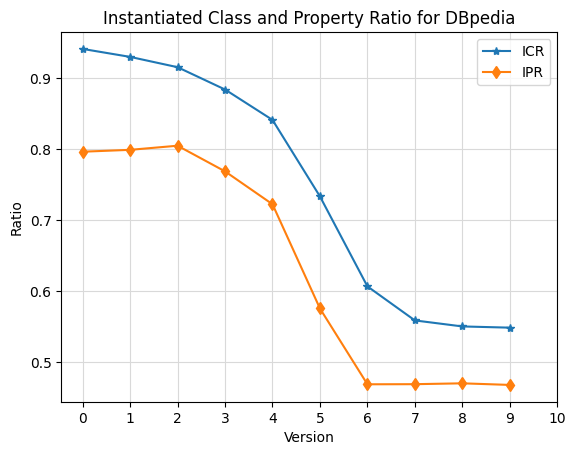

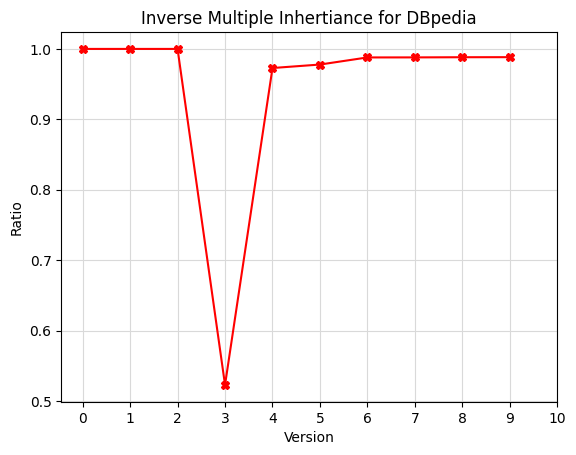

In [5]:
def quality_plots(file_path):
    
    df = pd.read_csv(file_path)
    
    #Plot 1
    plt.plot('ICR', data = df, marker = '*')
    plt.plot('IPR', data = df, marker = 'd')
    
    plt.xlabel("Version")
    plt.ylabel("Ratio")
    
    plt.legend(loc = 'upper right')
    plt.title('Instantiated Class and Property Ratio for DBpedia')
    
    plt.grid(axis='both', color='0.85')
    plt.xticks(np.arange(0, len(df['ICR'])+1, 1))
    
    plt.show()
    
    #Plot 2
    
    plt.plot('IMI', data = df, color = 'red', marker = 'X')
    plt.xlabel("Version")
    plt.ylabel("Ratio")
    plt.title('Inverse Multiple Inhertiance for DBpedia')
    plt.grid(axis='both', color='0.85')
    plt.xticks(np.arange(0, len(df['IMI'])+1, 1))

quality_plots(quality_path)

## Ontology and Graph Comparison



In [6]:
icr_path = r'D:\Andre programmer\Github\Github_Repo\P4\Data\icr_set.csv'
ipr_path = r'D:\Andre programmer\Github\Github_Repo\P4\Data\ipr_set.csv'

def ont_prepare(path):
    
    df = pd.read_csv(path, delimiter=';')

    df['external'] = df['len(Graph - Ont check)']/df['Graph set lenght']
    df = df.drop(['Graph - Ont check', 'Ont - Graph check', 'len(Ont - Graph check)'], axis = 1)
    df = df.rename(columns = {'len(Graph - Ont check)' : 'ex_set', 'Graph set lenght' : 'graph_set', 'Ont set lenght' : 'ont_set' })
    df['inst_ont'] = df['graph_set']-df['ex_set']
    df['ont_diff'] = df['ont_set']-df['inst_ont']

    df = df.sort_values(by = 'Version')
    
    return df

df_icr = ont_prepare(icr_path)
df_ipr = ont_prepare(ipr_path)

df_icr

,Graph,Version,ex_set,graph_set,ont_set,external,inst_ont,ont_diff
0,http://example.com/dbpedia_3-5,0,7,247,255,0.028340,240,15
1,http://example.com/dbpedia_3-5-1,1,7,246,257,0.028455,239,18
6,http://example.com/dbpedia_3-6,2,7,256,272,0.027344,249,23
7,http://example.com/dbpedia_3-7,3,50,332,319,0.150602,282,37
8,http://example.com/dbpedia_3-8,4,52,354,359,0.146893,302,57
9,http://example.com/dbpedia_3-9,5,53,440,529,0.120455,387,142
2,http://example.com/dbpedia_2015-04,6,263,707,735,0.371994,444,291
3,http://example.com/dbpedia_2015-10,7,13,426,739,0.030516,413,326
4,http://example.com/dbpedia_2016-04,8,13,428,754,0.030374,415,339
5,http://example.com/dbpedia_2016-10,9,13,430,760,0.030233,417,343


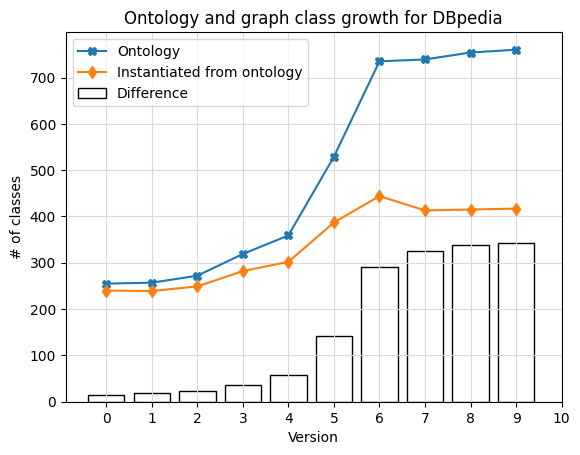

In [7]:
def ont_growth(file_path, title_name): 
    
    df = ont_prepare(file_path)
    
    x1 = np.array(df['Version'])
    y1 = np.array(df['ont_set'])
    y3 = np.array(df['ont_diff'])
    y4 = np.array(df['inst_ont'])

    plt.plot(x1,y1, marker = "X")
    plt.plot(x1,y4, marker = "d")
    plt.bar(x1,y3, fill = False)

    plt.xlabel("Version")
    plt.ylabel("# of classes")

    labels = ['Ontology', f'Instantiated from ontology', 'Difference']

    plt.legend(loc = 'upper left', labels = labels)
    plt.title(f'Ontology and graph {title_name} growth for DBpedia')

    plt.grid(axis='both', color='0.85')

    plt.xticks(np.arange(0, len(df_icr['external'])+1, 1))
    plt.show()

ont_growth(icr_path, 'class')

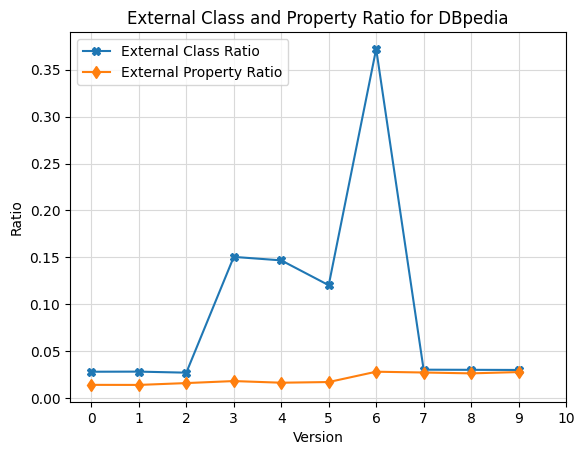

In [8]:
def external_ratio(class_path, property_path): 
    
    df_icr = ont_prepare(class_path)
    df_ipr = ont_prepare(property_path)
    
    x1 = np.array(df_icr['Version'])
    y1 = np.array(df_icr['external'])
    x2 = np.array(df_ipr['Version'])
    y2 = np.array(df_ipr['external'])

    plt.plot(x1,y1, marker = "X")
    plt.plot(x2,y2, marker = "d")

    plt.xlabel("Version")
    plt.ylabel("Ratio")

    labels = ['External Class Ratio', 'External Property Ratio']

    plt.legend(loc = 'upper left', labels = labels)
    plt.title('External Class and Property Ratio for DBpedia')

    plt.grid(axis='both', color='0.85')

    plt.xticks(np.arange(0, len(df_icr['external'])+1, 1))
    plt.show()

external_ratio(icr_path, ipr_path)

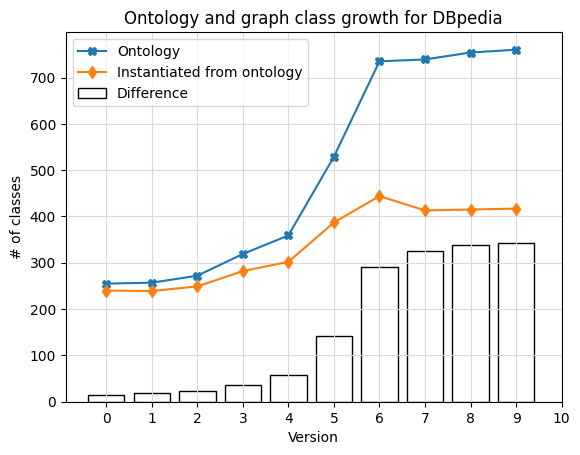

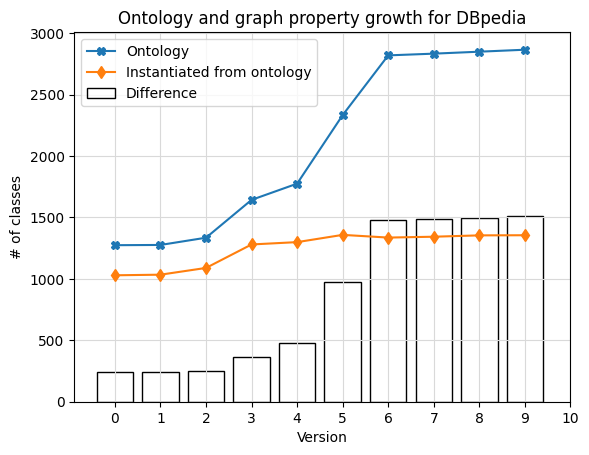

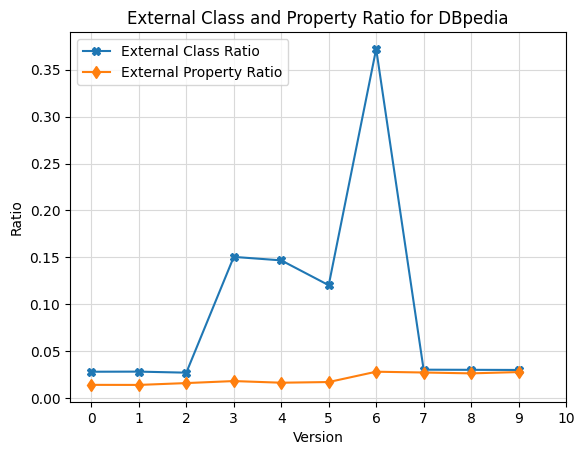

In [9]:
def ontology_plots(class_path, property_path): 
    
    ont_growth(class_path, 'class')
    ont_growth(property_path, 'property')
    
    external_ratio(class_path, property_path)

ontology_plots(icr_path,ipr_path)

## Now for some enitity analysis


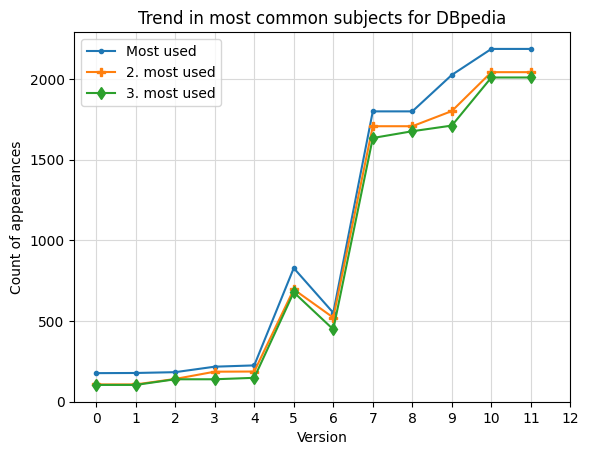

In [16]:
s_path = r'D:\Andre programmer\Github\Github_Repo\P4\Data\top_subjects.csv'

def top_trends(file_path, company, type):
    df = pd.read_csv(file_path)
    
    if company.lower() == 'dbpedia':
        df = df[df['File'].str.contains('dbpedia')]
    elif company.lower() == 'wikidata':
        df = df[df['File'].str.contains('wiki')]
    else:
        print('Incorrect company input')
    
    x = np.array(df['Version'].unique())
    y1 = np.array(df.loc[df['Rank'] == 1, 'Count'])
    y2 = np.array(df.loc[df['Rank'] == 2, 'Count'])
    y3 = np.array(df.loc[df['Rank'] == 3, 'Count'])
    
    plt.plot(x, y1, marker = ".")
    plt.plot(x, y2, marker = "P")
    plt.plot(x, y3, marker = "d")
    
    plt.xlabel("Version")
    plt.ylabel("Count of appearances")

    labels = ['Most common', '2. most common', '3. most common']

    plt.legend(loc = 'upper left', labels = labels)
    plt.title(f'Trend in most common {type} for {company}')

    plt.grid(axis='both', color='0.85')

    plt.xticks(np.arange(0, len(df['Version'].unique())+1, 1))
    
    plt.show()
    
top_trends(s_path, 'DBpedia', 'subjects')